In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from glob import glob
import statistics
from sklearn import svm

In [2]:
# Reading the data
# Calculating the final acceleration
# Transforming the data

files1_1 = sorted(glob('C:/Users/ronit/Desktop/FEMTODataSet/Learning_set/Bearing1_1/acc_*.csv')) 
all_files = [] 
for f in files1_1:    
    df = pd.read_csv(f, header = None, delimiter = ',')     
    df.columns =['hour', 'minute', 'second', 'μ-second', 'Horizontal Acceleration', 'Vertical Acceleration']
    import numpy as n     
    ax= n.power(df['Horizontal Acceleration'],2)     
    ay= n.power(df['Vertical Acceleration'],2)     
    df['acc']= n.sqrt(ax+ay)
    df['avg_acc'] = n.mean(df ['acc'])
    del df['Horizontal Acceleration']
    del df['Vertical Acceleration']
    del df['acc']
    del df['μ-second']

    df = df.drop_duplicates("avg_acc", keep='first') #Beseitigen der 2559 Duplikate je Datensatz                    
    all_files.append(df)     
df_1 = pd.concat(all_files, ignore_index=True) 

In [3]:
# Creating a table to show final acceleration at each time

df_1

,hour,minute,second,avg_acc
0,9,39,39,0.624844
1,9,39,49,0.597351
2,9,39,59,0.596334
3,9,40,9,0.622017
4,9,40,19,0.621827
...,...,...,...,...
2798,17,25,59,5.609605
2799,17,26,9,4.666145
2800,17,26,19,4.964347
2801,17,26,29,5.303595


Text(0, 0.5, 'Frequency')

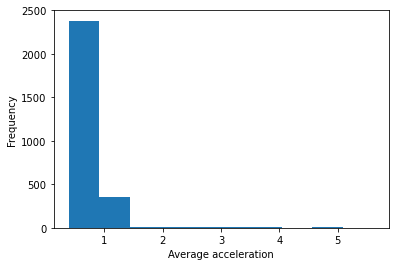

In [4]:
# Plotting a Histogram to visualise Average acceleration

plt.hist(df_1["avg_acc"])
plt.xlabel('Average acceleration')
plt.ylabel('Frequency')

In [5]:
# Buliding a 1-D array to help visualise a Line plot

arr = n.arange(1, 2804, 1)
print(arr.shape)
arr

(2803,)


array([   1,    2,    3, ..., 2801, 2802, 2803])

In [6]:
# Buliding a 1-D array to help visualise a Line plot
# Converting 1-D array into 2-D array
# Combining array arr and df_1

df_2 = n.column_stack((arr, df_1))

print(df_2.shape)
df_2

(2803, 5)


array([[1.00000000e+00, 9.00000000e+00, 3.90000000e+01, 3.90000000e+01,
        6.24844434e-01],
       [2.00000000e+00, 9.00000000e+00, 3.90000000e+01, 4.90000000e+01,
        5.97351112e-01],
       [3.00000000e+00, 9.00000000e+00, 3.90000000e+01, 5.90000000e+01,
        5.96334464e-01],
       ...,
       [2.80100000e+03, 1.70000000e+01, 2.60000000e+01, 1.90000000e+01,
        4.96434674e+00],
       [2.80200000e+03, 1.70000000e+01, 2.60000000e+01, 2.90000000e+01,
        5.30359527e+00],
       [2.80300000e+03, 1.70000000e+01, 2.60000000e+01, 3.90000000e+01,
        5.60176161e+00]])

In [7]:
# Buliding a 1-D array to help visualise a Line plot
# Save Numpy array to csv

np.savetxt('avgacc.csv', df_2, delimiter=',')

In [8]:
#Adding column names to dataset

dataset=pd.read_csv('C:/Users/ronit/Desktop/Plus10 Codes/avgacc.csv')

dataset.columns = ['Number', 'Hour', 'Minute', 'Second', 'Average acceleration']
dataset

,Number,Hour,Minute,Second,Average acceleration
0,2.0,9.0,39.0,49.0,0.597351
1,3.0,9.0,39.0,59.0,0.596334
2,4.0,9.0,40.0,9.0,0.622017
3,5.0,9.0,40.0,19.0,0.621827
4,6.0,9.0,40.0,29.0,0.607781
...,...,...,...,...,...
2797,2799.0,17.0,25.0,59.0,5.609605
2798,2800.0,17.0,26.0,9.0,4.666145
2799,2801.0,17.0,26.0,19.0,4.964347
2800,2802.0,17.0,26.0,29.0,5.303595


Text(0, 0.5, 'Average acceleration')

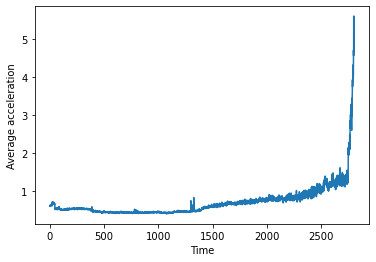

In [9]:
# Plotting a Line plot to visualise Average acceleration

plt.plot(dataset.Number, dataset["Average acceleration"])
plt.xlabel('Time')
plt.ylabel('Average acceleration')

In [10]:
# Using Wavelet Transform to extract 6 features from Average Acceleration

coeffs = pywt.wavedec(dataset, 'db1', mode='sym', level=5)
cA5, cB5, cB4, cB3, cB2, cB1 = coeffs
print(cA5)

[[  71.69313543]
 [  79.4684345 ]
 [  45.59995145]
 ...
 [2038.48800752]
 [2047.22572185]
 [2055.84723821]]


c:\users\ronit\appdata\local\programs\python\python38\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [11]:
# Normalization to bring all the features in the same scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cA5_N = sc.fit_transform(cA5)
cB1_N = sc.fit_transform(cB1)
cB2_N = sc.fit_transform(cB2)
cB3_N = sc.fit_transform(cB3)
cB4_N = sc.fit_transform(cB4)
cB5_N = sc.fit_transform(cB5)
print(cA5_N)

[[-1.70070817]
 [-1.68716057]
 [-1.74617269]
 ...
 [ 1.72621628]
 [ 1.74144079]
 [ 1.75646284]]


In [12]:
# Combining all the normalised features into 1 array to perform Principal Composition Analysis

combined_features = n.column_stack((cA5_N, cB5_N, cB4_N, cB3_N, cB2_N, cB1_N))
print(combined_features.shape)

(2802, 9)


In [13]:
combined_features

array([[-1.70070817,  0.        ,  0.        , ..., -1.73126037,
        -0.22104044,  0.        ],
       [-1.68716057,  0.        ,  0.        , ..., -1.73002061,
        -0.62982884,  0.        ],
       [-1.74617269,  0.        ,  0.        , ..., -1.72878085,
         1.45499201,  0.        ],
       ...,
       [ 1.72621628,  0.        ,  0.        , ...,  1.72890474,
         0.47389984,  0.        ],
       [ 1.74144079,  0.        ,  0.        , ...,  1.7301445 ,
         0.06511144,  0.        ],
       [ 1.75646284,  0.        ,  0.        , ...,  1.73138425,
        -0.34367696,  0.        ]])

In [14]:
# Performing PCA on the combined array

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(combined_features)
x_pca = pca.transform(combined_features)
print(combined_features.shape)
print(x_pca.shape)
x_pca

(2802, 9)
(2802, 1)


array([[ 3.44091771],
       [ 3.4218415 ],
       [ 3.50283719],
       ...,
       [-3.43318685],
       [-3.45226077],
       [-3.47133497]])

In [15]:
# Buliding an array "RUL" to give as output to SVR Model

rul = n.arange(1, 2803, 1)
print(arr.shape)

(2803,)


Text(0, 0.5, 'RUL')

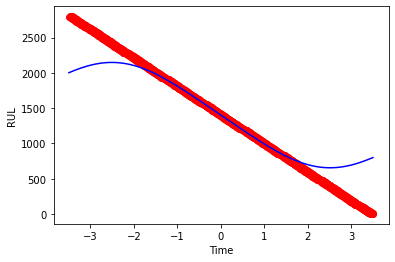

In [16]:
# Performing SVR
# regressor.fit(x,y) ## x- Input to Regressor Model (PCA), y- Output (Time to Failure)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_pca, rul)
x_pca_grid = np.arange(min(x_pca), max(x_pca), 0.01) 
x_pca_grid = x_pca_grid.reshape((len(x_pca_grid), 1))
plt.scatter(x_pca, rul, color = 'red')
plt.plot(x_pca_grid, regressor.predict(x_pca_grid), color = 'blue')
plt.xlabel('Time')
plt.ylabel('RUL')